# Basic Neural Network - Feed Forward

![BasicNN](basic-nn.png "Basic Neural Network")

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Input samples. e.g.:
# X = (hours sleeping, hours studying), y = Score on test
X = np.array(([3,5], [5,1], [10,2]), dtype=float)
y = np.array(([75], [82], [93]), dtype=float)

print("X and y matrices before normalization")
print(X)
print(y)

# Normalize x and y values:
# Scale our data taking advantage of the fact that all data is positive.
# Just divide by the maximum value for each variable, effectively scaling the result between 0 and 1.
X /= np.amax(X, axis=0)
y = y/100

print("X and y matrices AFTER normalization")
print(X)
print(y)

class Neural_Network(object):

    def __init__(self):
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3

        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)

    def forward(self, X):
        #Propagate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat

    def sigmoid(self, z):
        # Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))

    def sigmoidPrime(self, z):
        # Derivative of sigmoid function
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2

X and y matrices before normalization
[[  3.   5.]
 [  5.   1.]
 [ 10.   2.]]
[[ 75.]
 [ 82.]
 [ 93.]]
X and y matrices AFTER normalization
[[ 0.3  1. ]
 [ 0.5  0.2]
 [ 1.   0.4]]
[[ 0.75]
 [ 0.82]
 [ 0.93]]


# NN Creation and Forward Pass Execution

In [15]:
NN = Neural_Network()
yHat = NN.forward(X)
print(yHat)

[[ 0.49278003]
 [ 0.48267436]
 [ 0.4513265 ]]


# Compare Real Value vs. Estimation

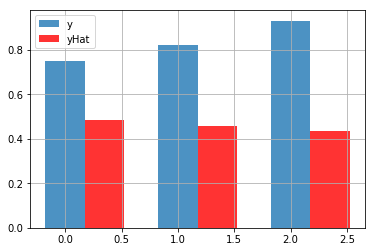

In [20]:
plt.clf
plt.bar([0,1,2], y, width = 0.35, alpha=0.8)
plt.bar([0.35,1.35,2.35], yHat, width = 0.35, color='r', alpha=0.8)
plt.grid(1)
plt.legend(['y', 'yHat'])
plt.show()

# Manually Calculate One Weight

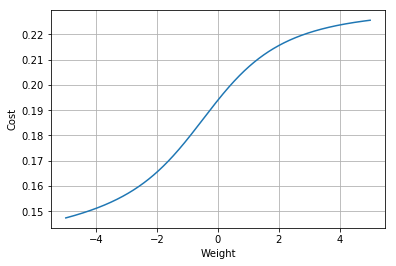

0.03769199999999984

In [21]:
import time

weightsToTry = np.linspace(-5,5,1000)
costs = np.zeros(1000)

startTime = time.clock()
for i in range(1000):
    NN.W1[0,0] = weightsToTry[i]
    yHat = NN.forward(X)
    costs[i] = 0.5*sum((y-yHat)**2)
    
endTime = time.clock()

plt.plot(weightsToTry, costs)
plt.grid(1)
plt.ylabel('Cost')
plt.xlabel('Weight')
plt.show()

timeElapsed = endTime-startTime
timeElapsed

## This however, does not scale for all the 9 weights in the figure as we would need 9 nested for loops! 

# Entering Derivatives...

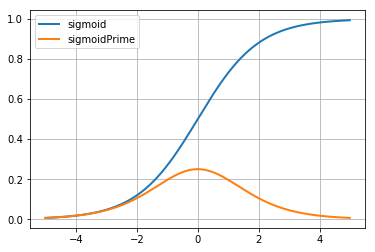

In [22]:
testValues = np.arange(-5,5,0.01)
plt.plot(testValues, NN.sigmoid(testValues), linewidth=2)
plt.plot(testValues, NN.sigmoidPrime(testValues), linewidth=2)
plt.grid(1)
plt.legend(['sigmoid', 'sigmoidPrime'])
plt.show()

In [34]:
NN = Neural_Network()
cost = NN.costFunction(X, y)
cost

array([ 0.11240501])

In [62]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)
print(dJdW1)
print(dJdW2)

[[-0.00072975 -0.00249805 -0.00528298]
 [ 0.00048242 -0.00015145  0.00134758]]
[[-0.00301954]
 [-0.00613736]
 [ 0.0007393 ]]


In [63]:
scalar = 3
NN.W1 = NN.W1 - scalar*dJdW1
NN.W2 = NN.W2 - scalar*dJdW2
cost3 = NN.costFunction(X, y)

In [64]:
print(cost, cost3)

(array([ 0.11240501]), array([ 0.00877288]))
